# "Research on Madrid's real estate market data (researching information, making recommendations to stakeholders, building a predictive pricing model)".

### Let's go!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
import statistics

In this paper we will analyse open data from Kaggle.com. File with information on properties in Madrid - [dataset "Madrid residential real estate"](https://www.kaggle.com/makofe/housesclean) 

Some comments will not appear as a separate line, but as comments to code, with a # sign - to show the ability to use this method of commenting as well.

Download the file, familiarise yourself with the content. Initial familiarisation.

In [ ]:
data = pd.read_csv('madrid_houses_clean.csv')
data.head()

,Unnamed: 0,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,buy_price,is_renewal_needed,has_lift,is_exterior,energy_certificate,has_parking,neighborhood,district,house_type
0,0,21742,64.0,2,1,1,0.0,3,85000,False,False,True,4,False,135,21,1
1,1,21741,70.0,3,1,1,0.0,4,129900,True,True,True,0,False,132,21,1
2,2,21740,94.0,2,2,1,0.0,1,144247,False,True,True,0,False,134,21,1
3,3,21739,64.0,2,1,1,0.0,-1,109900,False,True,True,0,False,134,21,1
4,4,21738,108.0,2,2,1,0.0,4,260000,False,True,True,0,True,133,21,1


The first column - the object numbers - does not give any information, because there is also an id column. Remove the first column.

In [ ]:
data = pd.read_csv('madrid_houses_clean.csv', sep=',', header=0, index_col=0)
data.reset_index(drop=True,inplace=True)
data.head()

,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,buy_price,is_renewal_needed,has_lift,is_exterior,energy_certificate,has_parking,neighborhood,district,house_type
0,21742,64.0,2,1,1,0.0,3,85000,False,False,True,4,False,135,21,1
1,21741,70.0,3,1,1,0.0,4,129900,True,True,True,0,False,132,21,1
2,21740,94.0,2,2,1,0.0,1,144247,False,True,True,0,False,134,21,1
3,21739,64.0,2,1,1,0.0,-1,109900,False,True,True,0,False,134,21,1
4,21738,108.0,2,2,1,0.0,4,260000,False,True,True,0,True,133,21,1


See how many columns (parameters) and rows (values)

In [ ]:
data.shape

(21739, 16)

Strings - 21,739, columns - 16
Let's try to see if there are any lost values:

In [ ]:
data = data.dropna()
data.shape

(21739, 16)

The dataframe is full, everything is OK. See what data formats are available here:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21739 entries, 0 to 21738
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21739 non-null  int64  
 1   sq_mt_built         21739 non-null  float64
 2   n_rooms             21739 non-null  int64  
 3   n_bathrooms         21739 non-null  int64  
 4   n_floors            21739 non-null  int64  
 5   sq_mt_allotment     21739 non-null  float64
 6   floor               21739 non-null  int64  
 7   buy_price           21739 non-null  int64  
 8   is_renewal_needed   21739 non-null  bool   
 9   has_lift            21739 non-null  bool   
 10  is_exterior         21739 non-null  bool   
 11  energy_certificate  21739 non-null  int64  
 12  has_parking         21739 non-null  bool   
 13  neighborhood        21739 non-null  int64  
 14  district            21739 non-null  int64  
 15  house_type          21739 non-null  int64  
dtypes: b

There are some parameters with values in bool format - boolean functions TRUE/FALSE. Let's replace them with numerical ones to be able to take them into account during processing.

In [ ]:
data[['is_renewal_needed', 'has_lift', 'is_exterior', 'has_parking']] = data[['is_renewal_needed', 'has_lift', 'is_exterior', 'has_parking']].astype('int64')

data.head()

,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,buy_price,is_renewal_needed,has_lift,is_exterior,energy_certificate,has_parking,neighborhood,district,house_type
0,21742,64.0,2,1,1,0.0,3,85000,0,0,1,4,0,135,21,1
1,21741,70.0,3,1,1,0.0,4,129900,1,1,1,0,0,132,21,1
2,21740,94.0,2,2,1,0.0,1,144247,0,1,1,0,0,134,21,1
3,21739,64.0,2,1,1,0.0,-1,109900,0,1,1,0,0,134,21,1
4,21738,108.0,2,2,1,0.0,4,260000,0,1,1,0,1,133,21,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21739 entries, 0 to 21738
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  21739 non-null  int64  
 1   sq_mt_built         21739 non-null  float64
 2   n_rooms             21739 non-null  int64  
 3   n_bathrooms         21739 non-null  int64  
 4   n_floors            21739 non-null  int64  
 5   sq_mt_allotment     21739 non-null  float64
 6   floor               21739 non-null  int64  
 7   buy_price           21739 non-null  int64  
 8   is_renewal_needed   21739 non-null  int64  
 9   has_lift            21739 non-null  int64  
 10  is_exterior         21739 non-null  int64  
 11  energy_certificate  21739 non-null  int64  
 12  has_parking         21739 non-null  int64  
 13  neighborhood        21739 non-null  int64  
 14  district            21739 non-null  int64  
 15  house_type          21739 non-null  int64  
dtypes: f

So, the data set for residential property in Madrid. The dataset consists of 21 thousand 739 rows and 17 columns. The output for work is 16, as the first column - Unnamed - is simply numbered in order. By columns:

Id is the identification number of the object. On the price has no effect. I left it for order.

sq_mt_built - Area of the object, sq.m.

n_rooms - number of rooms.

n_bathrooms - number of bathrooms.

n_floors - number of floors

sq_mt_allotment - number of floors.

floor - floor.

purchase_price - purchase price.

is_renewal_needed - if renovation is required.

has_lift - whether or not there is a lift.

is_exterior - exterior.

energy_certificate - energy certificate.

has_parking - whether there is a parking space.

neighbourhood - number of neighbours.

district - district.

house_type - type of house.

Let's look at the main characteristics of the data in the dataset - number, mean value, minimum and maximum, quartiles (by column) - see the spread of the parameters.

In [ ]:
data.describe()

,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,buy_price,is_renewal_needed,has_lift,is_exterior,energy_certificate,has_parking,neighborhood,district,house_type
count,21739.000000,21739.000000,21739.000000,21739.000000,21739.000000,21739.000000,21739.000000,2.173900e+04,21739.000000,21739.000000,21739.000000,21739.000000,21739.000000,21739.000000,21739.000000,21739.000000
mean,10871.122315,153.814950,3.006026,2.091265,1.233727,57.811951,1.833249,6.535729e+05,0.183633,0.685174,0.918258,1.139289,0.355030,62.802337,9.747412,1.407746
std,6276.868148,164.718815,1.510356,1.407185,0.709524,397.720529,3.039869,7.819661e+05,0.387194,0.464457,0.273978,1.902396,0.478533,38.343388,5.587888,1.016465
min,1.000000,13.000000,0.000000,1.000000,1.000000,0.000000,-5.000000,3.600000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,5435.500000,70.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.980000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,30.000000,5.000000,1.000000
50%,10870.000000,100.000000,3.000000,2.000000,1.000000,0.000000,2.000000,3.750000e+05,0.000000,1.000000,1.000000,0.000000,0.000000,59.000000,9.000000,1.000000
75%,16307.500000,165.000000,4.000000,2.000000,1.000000,0.000000,4.000000,7.625000e+05,0.000000,1.000000,1.000000,3.000000,1.000000,94.000000,14.000000,1.000000
max,21742.000000,2400.000000,24.000000,16.000000,7.000000,21000.000000,10.000000,8.800000e+06,1.000000,1.000000,1.000000,7.000000,1.000000,135.000000,21.000000,5.000000


It is very interesting to see what kind of objects are on the negative floors and how many of them there are:

In [ ]:
data[data['floor'] < 0]

,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,buy_price,is_renewal_needed,has_lift,is_exterior,energy_certificate,has_parking,neighborhood,district,house_type
3,21739,64.0,2,1,1,0.0,-1,109900,0,1,1,0,0,134,21,1
19,21723,60.0,2,1,1,0.0,-1,94900,0,0,1,0,0,135,21,1
23,21719,51.0,2,1,1,0.0,-2,93000,0,0,1,0,0,134,21,1
42,21700,97.0,2,2,1,0.0,-1,266122,0,1,1,0,0,131,21,1
50,21692,126.0,4,2,1,0.0,-1,275000,0,1,1,0,1,131,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21727,12,289.0,5,3,3,0.0,-5,820000,0,0,1,0,1,8,2,2
21728,11,276.0,4,4,4,189.0,-5,690000,0,0,1,1,1,11,2,2
21730,9,267.0,5,3,2,382.0,-5,790000,0,0,1,0,1,9,2,2
21736,3,175.0,4,2,1,0.0,-1,680000,0,0,1,3,1,9,2,1


There are quite a few objects in buried spaces. Let's take a look at the most 'buried' - is it not a mistake?

In [ ]:
data[data['floor'] < -4]

,id,sq_mt_built,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,floor,buy_price,is_renewal_needed,has_lift,is_exterior,energy_certificate,has_parking,neighborhood,district,house_type
85,21657,150.0,2,1,2,0.0,-5,159000,1,0,1,2,1,134,21,2
378,21364,240.0,4,3,3,0.0,-5,580000,0,0,1,0,1,134,21,2
402,21340,242.0,4,3,4,22.0,-5,380000,0,0,1,0,1,134,21,2
403,21339,166.0,3,1,3,166.0,-5,300000,1,0,1,0,0,133,21,2
531,21211,274.0,8,3,3,157.0,-5,495000,0,0,1,0,0,133,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21718,21,362.0,6,3,3,0.0,-5,715000,0,0,1,3,0,11,2,2
21727,12,289.0,5,3,3,0.0,-5,820000,0,0,1,0,1,8,2,2
21728,11,276.0,4,4,4,189.0,-5,690000,0,0,1,1,1,11,2,2
21730,9,267.0,5,3,2,382.0,-5,790000,0,0,1,0,1,9,2,2


1938 facilities on the -5th floor. This cannot be a mistake, it is more likely, judging by the area and number of rooms, that these are special facilities (non-residential or temporarily residential - shelters).

### Influence of various parameters on the price of a property:

Let's build a correlation matrix, which clearly shows how the different indicators are interrelated.

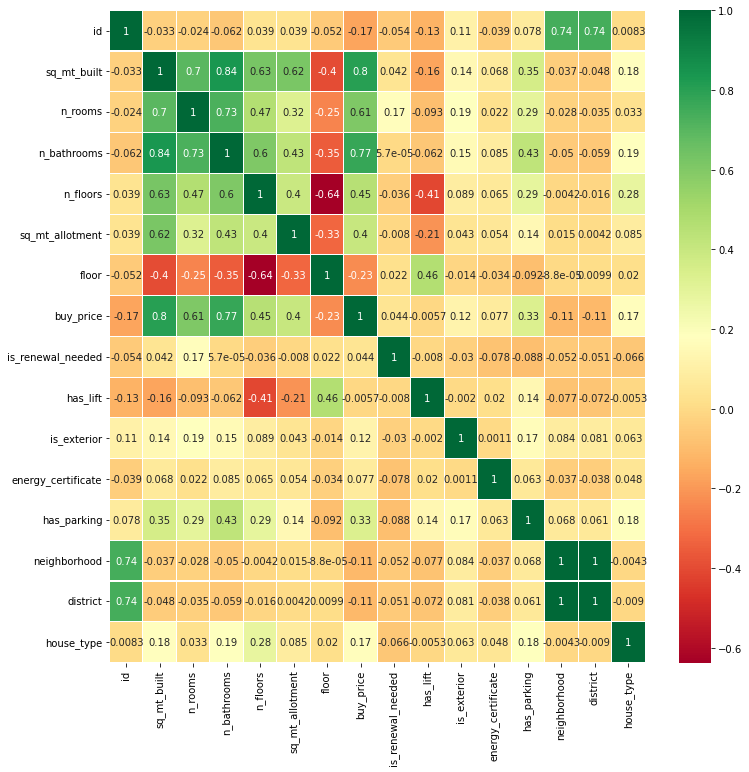

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

The maximum correlation in the "Purchase Price" parameter is observed in the parameters "Property Area", "Number of Rooms" and "Number of Bathrooms".
The parameters "Number of Floors" and "Servetout" (here, perhaps, we are talking about the total area that can be used by the owner of the object) correlate with the price to a lesser extent, but their impact on the price as a whole - positive. The parameters "Floor" and "District", on the other hand, have a negative impact on the price. Which also makes sense in principle - in Europe, lower floors are more expensive than upper floors. The exceptions are the expensive penthouses in skyscrapers and basements - and we have premises on the -5th floor, and quite a few of them.

Let's look at the pairwise correlation of the main indicators that affect price.

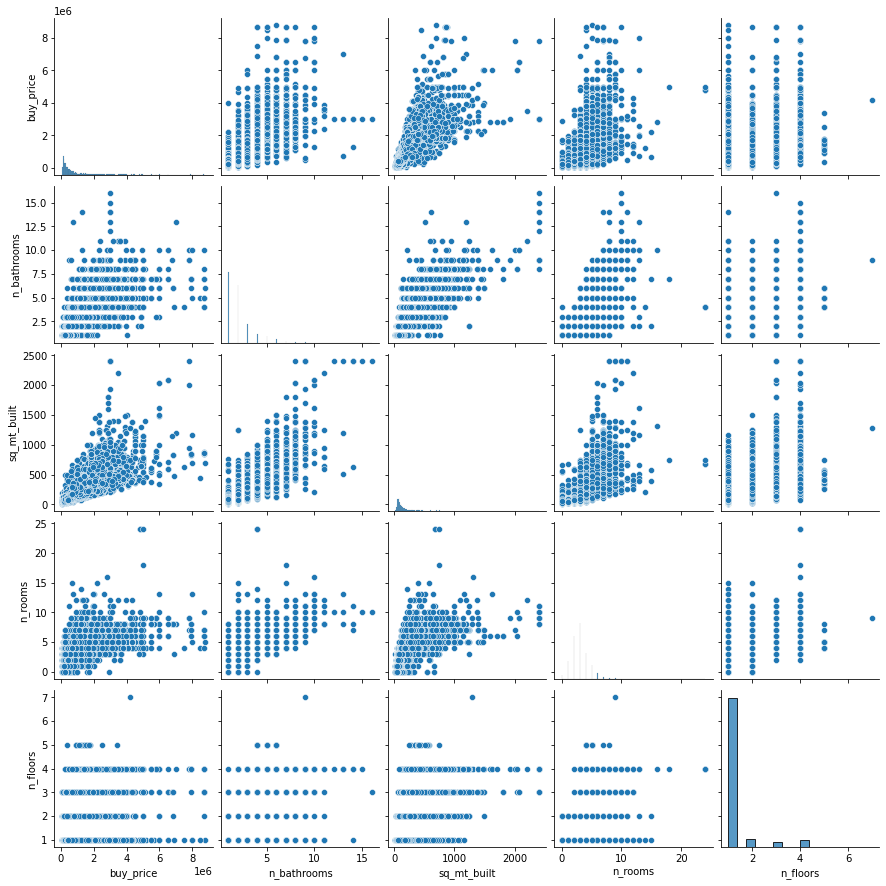

In [ ]:
sns.pairplot(data, vars=['buy_price', 'n_bathrooms', 'sq_mt_built', 'n_rooms', 'n_floors'], 
             kind="scatter")

The clearest direct correlation is between the size of the property and its price. Yes, we all end up buying square meters. The second place is the number of rooms. It is a little surprising (for a former Soviet person) to see that the number of bathrooms affects the price more than the floor, neighborhood, and parking availability. Well, that's why we explore this dataset, to reveal interesting (and unexpected!) correlations.

So, here is a graph of the basic relationship - price versus area.

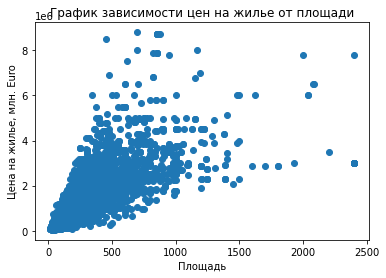

In [ ]:
plt.scatter(data['sq_mt_built'], data['buy_price'])

plt.title("The graph on the relationship between house prices and floorspace")
plt.ylabel('Цена на жилье, млн. Euro')
plt.xlabel('Площадь')
plt.show()

And, for clarity, let's visualise the relationship between the parameters with almost 100% correlation - 'Number of neighbours' and 'Neighbourhood'. In principle, this probably makes sense for Madrid - there are neighbourhoods with dense blocks of flats, there are areas of low-rise development.

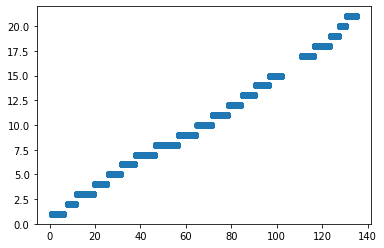

In [ ]:
plt.scatter(data['neighborhood'], data['district'])

It's just "one in the same".


### Modelling

To build the model, remove the parameters "id" as not affecting price, and "dneighbourhood" as a duplicate. The parameter "district" will suffice for us

In [ ]:
data.columns

Index(['id', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'n_floors',
       'sq_mt_allotment', 'floor', 'buy_price', 'is_renewal_needed',
       'has_lift', 'is_exterior', 'energy_certificate', 'has_parking',
       'neighborhood', 'district', 'house_type'],
      dtype='object')

In [ ]:
X, y = data[['sq_mt_built', 'n_rooms', 'n_bathrooms', 'n_floors',
       'sq_mt_allotment', 'floor', 'is_renewal_needed',
       'has_lift', 'is_exterior', 'energy_certificate', 'has_parking',
       'neighborhood', 'house_type']], data['buy_price']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Bring data to the same scale using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Construct a linear regression model, and assess its quality.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# look at the coefficient of determination - how much does Y depend on X
model.score(X_test, y_test)

0.7266537297448077

We see that a dependence of 0.7 is quite significant.

Let's evaluate the quality of the model. We use the RMSE (root mean square error) metric

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Quality will be assessed on the training data:
mean_squared_error(y_train, model.predict(X_train), squared= False)

430755.1624085941

In [ ]:
# and on the data for the test:
mean_squared_error(y_test, model.predict(X_test), squared= False)

405655.76502751966

### Conclusions

In this paper, a study of Madrid's real estate market data was carried out using data from the Madrid Residential Real Estate dataset.

The study also built a model for predicting real estate prices that has sufficient predictive power.

The results of the data research allow conclusions to be drawn on two fronts - the dataset itself and the data on the real estate market in Madrid.
1. On the Dataset: 
- we can see the redundancy of information in the dataset, namely the first two columns, "number in order" and "object identification number" actually duplicate each other. This may be a consequence of the fact that the dataset is most probably maintained in Excel, and the line numbers are entered by the official simply out of inertia. When working with the dataset, it makes sense to delete this column.
2. On the Market data:
- the following parameters have the greatest influence on the price of an object: (in descending order of importance): object area, number of bathrooms, number of rooms. 
- The parameters "number of neighbours" and "neighbourhood" have 100% correlation with each other and the same correlation value with the parameter "object price" (-0,11), i.e. when determining the object price "outright", i.e. within all dataset data, without additional filtering by any of the parameters any of these two parameters can be neglected without considering the evaluation quality.

To sum up: the dependence of the price of a property on its area is an expected result. What is interesting is that the number of bathrooms affects the price more than the number of rooms. Also noteworthy is the insignificant influence of the area on the price of the property. 
As a result of the analysis, recommendations will be made to change the order of the questions and the weighting of the questionnaires filled in by clients interested in real estate in Madrid.

